##Using Poltical Affliation of media website as a factor for determining Fake News

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

#Using the fake or real news model for data enrichment

In [29]:
from google.colab import files
uploaded = files.upload()

Saving fake_or_real_news.csv to fake_or_real_news (2).csv


In [30]:
dt = pd.read_csv("fake_or_real_news.csv")
dt.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [0]:
dt = dt.set_index("Unnamed: 0")

In [32]:
dt.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [33]:
dt.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [0]:
# Set `y` 
y = dt.label 

# Drop the `label` column
dt.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(dt['text'], y, test_size=0.33, random_state=53)

In [35]:
X_train.head()

Unnamed: 0
8055                                                     
5656    Report Copyright Violation Do you think there ...
669     The election in 232 photos, 43 numbers and 131...
5630    Email Ever wonder what’s on the mind of today’...
9797    Wells Fargo is Rotting from the Top Down Wells...
Name: text, dtype: object

In [36]:
y_train.head()

Unnamed: 0
8055    FAKE
5656    FAKE
669     REAL
5630    FAKE
9797    FAKE
Name: label, dtype: object

#Build Vectorizer Classifiers using count vectorizers


In [0]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

#Build Tf-idf vectorizer


In [0]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [39]:
print(tfidf_test)

  (0, 56196)	0.043317993781946
  (0, 56091)	0.032700334892684514
  (0, 55858)	0.05420932672571138
  (0, 55358)	0.059873902121258926
  (0, 55027)	0.048465128413932454
  (0, 54772)	0.06742854646276102
  (0, 54647)	0.03727533728426692
  (0, 54484)	0.1271579409566499
  (0, 54400)	0.05200707680397371
  (0, 54182)	0.17039563890103226
  (0, 52193)	0.050614987002584974
  (0, 52166)	0.09946716362549408
  (0, 52164)	0.07141989873688631
  (0, 51896)	0.09946458588236584
  (0, 51083)	0.06988430196901438
  (0, 50973)	0.11421142130023298
  (0, 50920)	0.08108261495679815
  (0, 50712)	0.07153047197062776
  (0, 50690)	0.05024667107829908
  (0, 50627)	0.04286648720912277
  (0, 48965)	0.06202757667895662
  (0, 48929)	0.17556869825083593
  (0, 46631)	0.14220349264725846
  (0, 46621)	0.10706347107534141
  (0, 44522)	0.040932482324428275
  :	:
  (2090, 5969)	0.03303772830203347
  (2090, 5576)	0.04943418930560652
  (2090, 5530)	0.05752451982231977
  (2090, 4919)	0.026792001261175008
  (2090, 4321)	0.038896002

In [40]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [41]:
# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[0:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']



 Token values  by Both The Vectorizers Are Same

In [42]:

count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference
set()
print(count_df.equals(tfidf_df))
count_df.head()

False


,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix for TFIDF

accuracy:   0.857
Confusion matrix, without normalization


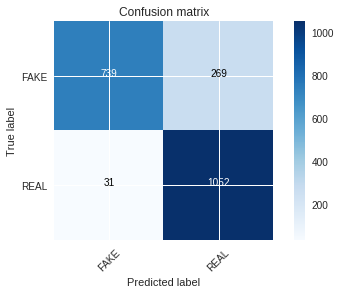

In [44]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Confusion matrix for count vectorizer(bag of words)

accuracy:   0.893
Confusion matrix, without normalization


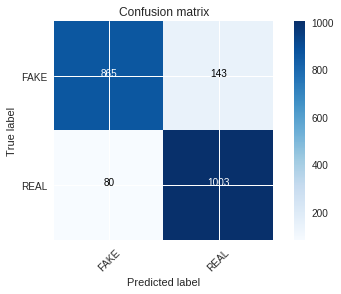

In [45]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


Confusion matrix using Passive Aggresive Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.935
Confusion matrix, without normalization


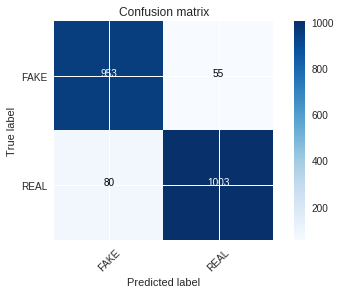

In [46]:

linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

To find the important words using vectorizer and binary classifier

In [47]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -4.981068812045112 2016
FAKE -4.152471260707636 october
FAKE -3.9495900585664327 hillary
FAKE -3.2737535987464166 share
FAKE -3.042852371257945 article
FAKE -2.787556263206095 november
FAKE -2.658248031638774 print
FAKE -2.4811727138500497 email
FAKE -2.3213113006282433 establishment
FAKE -2.318180682092223 oct
FAKE -2.3071942950899 advertisement
FAKE -2.1692433229317194 election
FAKE -2.1626847894609775 source
FAKE -2.140344139363059 mosul
FAKE -2.106359750819652 war
FAKE -2.0788775018623937 podesta
FAKE -1.8852904535292756 jewish
FAKE -1.867928547040019 corporate
FAKE -1.8647066502032354 nov
FAKE -1.8358671223275296 com
FAKE -1.7771008609656838 wikileaks
FAKE -1.7704625094294317 pm
FAKE -1.7214658328232 pipeline
FAKE -1.715688163889906 26
FAKE -1.6931700213354461 ayotte
FAKE -1.666366546956654 photo
FAKE -1.6663254628958428 dr
FAKE -1.6531551972258343 snip
FAKE -1.647940602157594 donald
FAKE -1.6163153809570108 dakota

REAL 4.748547026224729 said
REAL 2.738775396277021 says
REAL

In [48]:
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.477148234163137, 'said'),
 (-4.5936919152219655, 'trump'),
 (-4.98170150128453, 'clinton'),
 (-5.455931002028523, 'people'),
 (-5.482207812723569, 'president'),
 (-5.511414074572205, 'obama'),
 (-5.515621480853161, 'state'),
 (-5.5727798946931095, 'new'),
 (-5.63452121120962, 'campaign'),
 (-5.728156816243612, 'republican'),
 (-5.844483857160232, 'party'),
 (-5.949002396420198, 'sanders'),
 (-5.964034477506528, 'states'),
 (-5.97418288622825, 'time'),
 (-5.986816295469049, 'just'),
 (-5.9903983888515535, 'like'),
 (-6.067024557833956, 'house'),
 (-6.115534950553315, 'political'),
 (-6.126896127062493, 'percent'),
 (-6.172241591175732, 'republicans')]

From the dataset , we find the most important features of the dataset that helps in determining fake or not.  certain words which might show political intent and source in the top fake features 

In [51]:
!pip install tldextract
%matplotlib inline
import time
import re
import tldextract


## Using Fake news data set from Kaggle. I have used a subset of records from original dataset 

In [52]:
from google.colab import files
uploaded = files.upload()

Saving fake_real_dataset.csv to fake_real_dataset.csv


In [53]:
#f = pd.read_csv('fake_news_subset.csv', nrows = 2000, encoding = "ISO-8859-1")
f = pd.read_csv('fake_real_dataset.csv', nrows = 2000, encoding = "ISO-8859-1")
print (f.shape)
f.head()

(2000, 20)


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,88465,Muslims BUSTED: They Stole Millions In GovâÃ...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,88465,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,88465,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,88465,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,88465,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [54]:
f.type.value_counts()

bs            1605
conspiracy     224
satire         100
bias            53
fake            15
news             3
Name: type, dtype: int64

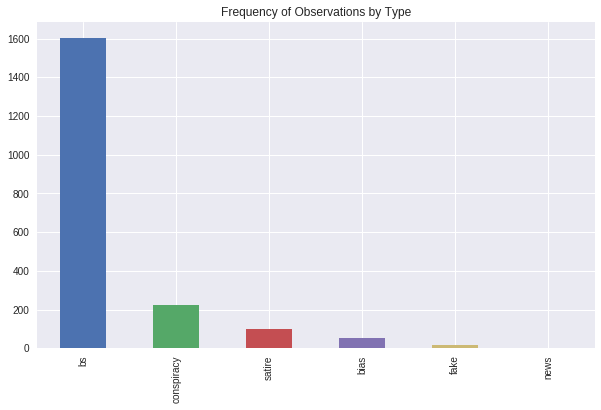

In [55]:
plt.figure(figsize=(10,6))
f.type.value_counts().plot(kind='bar',title = 'Frequency of Observations by Type', grid = True)

In [56]:
len(f.language.unique())

1

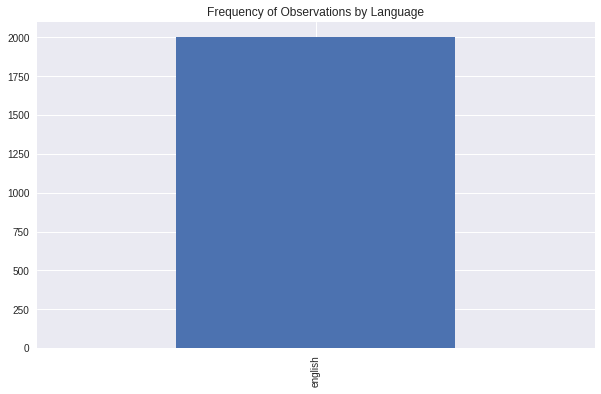

In [57]:

plt.figure(figsize=(10,6))
f.language.value_counts().plot(kind='bar',title = 'Frequency of Observations by Language', grid = True)

In [0]:
l = []
for i in range(len(f.text)):
    l.append(len(str(f.text[i])))
l = pd.DataFrame(l)
f['textlen'] = l

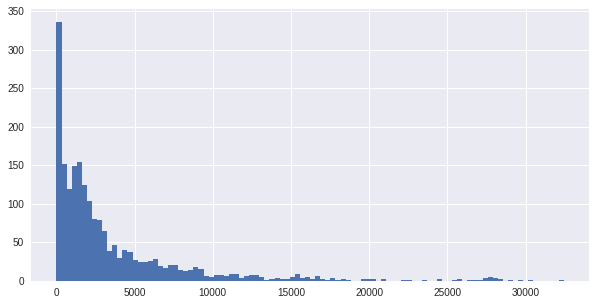

In [59]:
plt.figure(figsize=(10,5))
f.textlen.hist(bins = 100)

Considering to drop non English news , and text 

In [60]:
f = f[f.language == 'english']
f = f[(f.textlen > 500)&(f.textlen < 12000)]
f = f[['site_url', 'title', 'text']]
f.reset_index(drop = 'index', inplace=True)
f.rename(columns = {'site_url':'url'}, inplace=True)
print (f.shape)
f.head()

(1446, 3)


,url,title,text
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...


In [61]:
f.url.value_counts()[:200].sum()

1446

In [0]:
f['label'] = 'FAKE'

In [63]:
f.head(2)

,url,title,text,label
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...,FAKE
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,FAKE


Bias of the websites towards certain political organisations are identified from mediafactcheck.com. It can be seen that some websites do not have affliation to any organization.Most of news sources fall into satirical and conspiracy

In [0]:
f['wing'] = '0-unknown'
f['conspiracy'] = 0
f['satire'] = 0
f['src_url_polarity']= 0

In [65]:
f.head(5)

,url,title,text,label,wing,conspiracy,satire,src_url_polarity
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...,FAKE,0-unknown,0,0,0
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,FAKE,0-unknown,0,0,0
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,FAKE,0-unknown,0,0,0
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FAKE,0-unknown,0,0,0
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,FAKE,0-unknown,0,0,0


After checking the factcheck website , we classify certain news websites belonging to political affliations such as left, right , and center

In [0]:
f.loc[f.url.str.contains('consortiumnews|usatoday|politifact|sctimes|timesofsandiego'),'wing'] = '4-center'
f.loc[f.url.str.contains('presstv|mintpressnews|latimes|chicagotribune|bustle|natmonitor|politico'),'wing'] = '3-center left'
f.loc[f.url.str.contains('antiwar|russia-insider|sputniknews|strategic-culture|postbulletin|hpenews|ustfactsdaily'),'wing'] = '5-center right'
f.loc[f.url.str.contains('politicususa|opednews|liberalamerica|truthdig|counterpunch|blackagendareport|guardianlv|ahtribune|intrepidreport|wakingtimes|addictinginfo|activistpost|other98|countercurrents|huffingtonpost|rabble|cnn'),'wing'] = '2-left'
f.loc[f.url.str.contains('naturalnews|ijr|wearechange|awdnews|twitchy|thenewamerican|amtvmedia|abovetopsecret|nowtheendbegins|thecommonsenseshow|fromthetrenchesworldreport|nakedcapitalism|prisonplanet|investmentwatchblog|ronpaulinst|thecontroversialfiles|gulagbound|rt|thedailybell|corbettreport|zerohedge|whatreally|wikileaks|newstarg|regated|southfront'),'wing'] = '6-right'
f.loc[f.url.str.contains('occupydemocrats|ifyouonlynews|pravdareport|usuncut|newcenturytimes|trueactivist|dailynewsbin'),'wing'] = '1-extreme left'
f.loc[f.url.str.contains('madworldnews|thefederalistpapers|conservativetribune|libertyunyielding|truthfeed|freedomoutpost|frontpagemag|dccl|othesline|wnd|ihavethetruth|amren|barenakedislam|returnofkings|trunews|jewsnews|shtfplan|lewrockwell|dailystormer|libertynews|endingthefield|dailywire|vdare|100percentfedup|21stcenturywire|westernjournalism|redflagnews|libertywritersnews|conservativedailypost|departed|breitbart|donaldtrumpnews.co|bipartisanreport|americanlookout|spinzon|usapoliticsnow|usanewsflash|hangthebankers|toprightnews|usasupreme|americasfreedomfighters|viralliberty'),'wing'] = '7-extreme right'

To classify , certain news sources publishing conspiracy and pseudo science theories

In [0]:

f.loc[f.url.str.contains('yournewswire|trunews|naturalnews|infowars|eutimes|truthfeed|topinfopost|thedailysheeple|jewsnews|wearechange|awdnews|worldtruth|govtslaves|thetruthseeker.co|amtvmedia|sott|abovetopsecret.com|collective-evolution.com|shtfplan.com|theeventchronicle.com|thefreethoughtproject.com|humansarefree.com|veteranstoday.com|lewrockwell.com|nowtheendbegins.com|thecommonsenseshow.com|themindunleashed.comfromthetrenchesworldreport.com|intellihub.com|realfarmacy.com|greanvillepost.com|dailystormer.com|disclose.tv|whydontyoutrythis.com|prisonplanet.com|investmentwatchblog.com|thecontroversialfiles.net|godlikeproductions.com|anonhq.com|abeldanger.net|wakingtimes.com |gulagbound.com|endingthefed.com|healthimpactnews.com|truthbroadcastnetwork.com|21stcenturywire.com|corbettreport.com|undergroundhealth.com|zerohedge.com|geoengineeringwatch.org|conservativedailypost.com|pakalertpress.com|whatreallyhappened.com|coasttocoastam.com|trueactivist.com|activistpost.com|theantimedia.org|usapoliticsnow.com|newstarget.com|theearthchild.co.za|anonews.co|southfront.org|americasfreedomfighters.com|davidwolfe.com|vigilantcitizen.com'),'conspiracy'] = 1

Classfiying certain sources as satire from mediafactcheck.com

In [0]:
f.loc[f.url.str.contains('waterfordwhispersnews|theonion|thedailymash|thespoof|clickhole|newsthump|newsbiscuit|theunrealtimes|dailysquib|adobochronicles|gomerblog|thelastlineofdefense|satirewire|reductress'),'satire'] = 1

## 
Democrat  left  0.0 to 0.49

center neutral 0.5
Republican right 0.51 to 1

In [0]:
f.loc[f.url.str.contains('consortiumnews|usatoday|politifact|sctimes|timesofsandiego'),'src_url_polarity'] = '0.5'
f.loc[f.url.str.contains('presstv|mintpressnews|latimes|chicagotribune|bustle|natmonitor|politico'),'src_url_polarity'] = '0.4'
f.loc[f.url.str.contains('antiwar|russia-insider|sputniknews|strategic-culture|postbulletin|hpenews|ustfactsdaily'),'src_url_polarity'] = '0.6'
f.loc[f.url.str.contains('politicususa|opednews|liberalamerica|truthdig|counterpunch|blackagendareport|guardianlv|ahtribune|intrepidreport|wakingtimes|addictinginfo|activistpost|other98|countercurrents|huffingtonpost|rabble|cnn'),'src_url_polarity'] = '0.2'
f.loc[f.url.str.contains('naturalnews|ijr|wearechange|awdnews|twitchy|thenewamerican|amtvmedia|abovetopsecret|nowtheendbegins|thecommonsenseshow|fromthetrenchesworldreport|nakedcapitalism|prisonplanet|investmentwatchblog|ronpaulinst|thecontroversialfiles|gulagbound|rt|thedailybell|corbettreport|zerohedge|whatreally|wikileaks|newstarg|regated|southfront'),'src_url_polarity'] = '0.9'
f.loc[f.url.str.contains('occupydemocrats|ifyouonlynews|pravdareport|usuncut|newcenturytimes|trueactivist|dailynewsbin'),'src_url_polarity'] = '0.0'
f.loc[f.url.str.contains('madworldnews|thefederalistpapers|conservativetribune|libertyunyielding|truthfeed|freedomoutpost|frontpagemag|dccl|othesline|wnd|ihavethetruth|amren|barenakedislam|returnofkings|trunews|jewsnews|shtfplan|lewrockwell|dailystormer|libertynews|endingthefield|dailywire|vdare|100percentfedup|21stcenturywire|westernjournalism|redflagnews|libertywritersnews|conservativedailypost|departed|breitbart|donaldtrumpnews.co|bipartisanreport|americanlookout|spinzon|usapoliticsnow|usanewsflash|hangthebankers|toprightnews|usasupreme|americasfreedomfighters|viralliberty'),'src_url_polarity'] = '1.0'

Classifying the dataset into different types of political affliations

In [70]:
f.wing.value_counts()

0-unknown          459
6-right            420
7-extreme right    352
2-left             120
5-center right      95
Name: wing, dtype: int64

In [71]:
f.head(100)

,url,title,text,label,wing,conspiracy,satire,src_url_polarity
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...,FAKE,7-extreme right,0,0,1.0
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,FAKE,7-extreme right,0,0,1.0
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,FAKE,7-extreme right,0,0,1.0
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FAKE,7-extreme right,0,0,1.0
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,FAKE,7-extreme right,0,0,1.0
5,100percentfedup.com,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,FAKE,7-extreme right,0,0,1.0
6,100percentfedup.com,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,FAKE,7-extreme right,0,0,1.0
7,100percentfedup.com,BREAKING: CLINTON CLEARED...Was This A Coordin...,\r\nLimbaugh said that the revelations in the ...,FAKE,7-extreme right,0,0,1.0
8,100percentfedup.com,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""âÃ...",Email \r\nThese people are sick and evil. They...,FAKE,7-extreme right,0,0,1.0
9,100percentfedup.com,SAY GOODBYE! These 23 Hollywood Celebs Threate...,\r\nWho? Comedian. \r\nWhere would she move? S...,FAKE,7-extreme right,0,0,1.0


Plotting the dataset showing the distribution of political affliation

0-unknown          459
6-right            420
7-extreme right    352
2-left             120
5-center right      95
Name: wing, dtype: int64

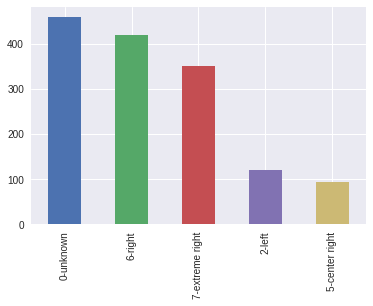

In [72]:
f.wing.value_counts().plot(kind = 'bar')
f.wing.value_counts()

Finding the top 10 words that help in associating the news the political affliation

In [73]:
z_z = pd.DataFrame()
z_ = []
for i in sorted(f.wing.unique()):
    cvec = CountVectorizer(stop_words='english')
    cvec.fit(f[f.wing == i].text)
    cvecdata = cvec.transform(f[f.wing == i].text)
    df = pd.DataFrame(cvecdata.todense(),
                     columns = cvec.get_feature_names())
    z_ = pd.DataFrame(df.sum())
    z_.columns = ["sums"]
    z_ = pd.DataFrame(z_.sums.sort_values(ascending=False)[:100]/float(z_.sum())*100)
    z_z = pd.concat([z_z,z_], axis = 1)
z_z.columns = f.wing.unique()
z_z.dropna(inplace = True)
print (z_z.shape)

(22, 5)


Saving the most important words for showing political affliations

In [74]:

z_z = z_z[sorted(f.wing.unique())]
z_z['mean'] = z_z.mean(axis=1)
z_z = z_z.sort_values(by = "mean", ascending=False)[:10]
z_z.to_csv("fake_word_freq.csv")
z_z

,0-unknown,2-left,5-center right,6-right,7-extreme right,mean
ã¹,1.030928,1.712110,2.226192,1.291159,1.386051,1.529288
clinton,0.463918,0.646702,0.626533,0.169147,0.434077,0.468075
people,0.447423,0.525535,0.498560,0.321380,0.487213,0.456022
said,0.362887,0.519799,0.763837,0.180424,0.347261,0.434842
2016,0.148454,0.303276,0.451904,0.360848,0.133217,0.279540
president,0.249485,0.374972,0.275941,0.276274,0.197580,0.274850
government,0.204124,0.195014,0.162632,0.592016,0.201322,0.271022
new,0.210309,0.303276,0.283939,0.259359,0.297866,0.270950
time,0.228866,0.231579,0.219953,0.264998,0.330048,0.255089
state,0.243299,0.314030,0.243948,0.140956,0.212548,0.230956


In [75]:
df.head()

,00,000,007,01,03,033,04,05,057,07,...,ãºyou,ãºyoung,ãºyour,ãºyouâ,ãºzapâ,ãºâ,ã¼e,ã¼â,ã¼ã,ã¼æ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:

f.groupby('wing').sum()

,conspiracy,satire
wing,,
0-unknown,184,110
2-left,8,0
5-center right,0,0
6-right,296,0
7-extreme right,38,0


To show the words that satirical artcles are mostly made

In [77]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(f[f.satire == 1].text)
cvecdata = cvec.transform(f[f.satire == 1].text)
df = pd.DataFrame(cvecdata.todense(),
                 columns = cvec.get_feature_names())
z_ = pd.DataFrame(df.sum())
z_.columns = ["percent"]
z_ = pd.DataFrame(z_.percent.sort_values(ascending=False)[:100]/float(z_.sum())*100)
z_.head(10)

,percent
ã¹,1.217122
just,0.737494
itâ,0.567303
like,0.515730
trump,0.500258
youâ,0.453842
time,0.438370
email,0.407427
donâ,0.386797
make,0.376483


Using the trained model of fake which was used in this notebook previously , we transform the current dataset

In [0]:
tfidf_test = tfidf_vectorizer.transform(f.text)
y = f.label

To get the feature names of tfidf vectorizer

In [80]:
 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [0]:
pred = clf.predict(tfidf_test)

In [82]:
pred_df = pd.DataFrame(pred)
pred_df[0].value_counts()

FAKE    1309
REAL     137
Name: 0, dtype: int64

In [83]:
score = accuracy_score(y, pred_df)
print("accuracy:  ", score * 100 ) 

accuracy:   90.52558782849239


Confusion matrix, without normalization


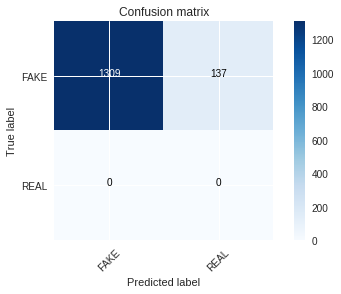

In [84]:
cm = confusion_matrix(y, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

The kaggle  datasets for fake news has been enriched to show the affliation of news sources to political organisations . By using the trained model of first dataset (fakereal dataset), and using it to predict the text of Fake news dataset , helped to classify the news articles as fake or real and 91 percent accuracy has been achieved

In [85]:
f.head()

,url,title,text,label,wing,conspiracy,satire,src_url_polarity
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...,FAKE,7-extreme right,0,0,1.0
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,FAKE,7-extreme right,0,0,1.0
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,FAKE,7-extreme right,0,0,1.0
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FAKE,7-extreme right,0,0,1.0
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,FAKE,7-extreme right,0,0,1.0


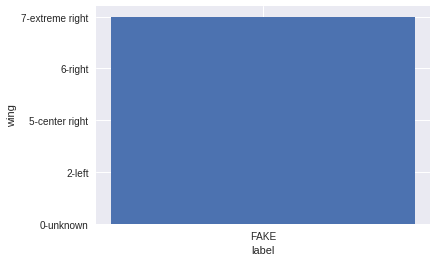

In [86]:
plt.bar(f['label'],f['wing'])
plt.xlabel("label")
plt.ylabel("wing")
plt.figure()

###Perform LDA

to convert text to lowercase, tokenize, remove stop words, remove words with less than 2 character, stem the word to root 

In [87]:
 
  
import random
import string
import re
import nltk

nltk.download('punkt')
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
stop = set(stopwords.words('english') + list(string.punctuation))
stemmer = PorterStemmer()
re_punct = re.compile('[' + ''.join(string.punctuation) + ']')

In [0]:
def preprocess(text):
    try:
        text = text.lower()
        #print("line1\n")
        #print(text)
        #import pdb
        #pdb.set_trace()
        tokens = word_tokenize(text)
        #print("======line2\n")
        #print(tokens[0])
        #print("line2")
        tokens = [t for t in tokens if not t in stop]
        #print("line3")
        tokens = [re.sub(re_punct, '', t) for t in tokens]
        tokens = [t for t in tokens if len(t) > 2]
        tokens = [stemmer.stem(t) for t in tokens]
        if len(tokens) == 0:
            return None
        else:
            return ' '.join(tokens)
    except:
        #print("None")
        return None
      

In [0]:
# Corpus cleaning
STOPWORDS = set(stopwords.words('english'))
def clean_str(string):
    """
    Tokenization/string cleaning for datasets.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"^b", "", string)
    string = re.sub(r"\\n ", "", string)
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = ' '.join(Word(word).lemmatize() for word in string.split() if word not in STOPWORDS) # delete stopwors from text

    return string.strip().lower()

In [149]:

data_f = f[['url','title','text','wing', 'conspiracy', 'label','src_url_polarity']]
print (data_f.shape)
data_f.head()

(1446, 7)


,url,title,text,wing,conspiracy,label,src_url_polarity
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,1.0
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,1.0
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,7-extreme right,0,FAKE,1.0
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,7-extreme right,0,FAKE,1.0
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,7-extreme right,0,FAKE,1.0


In [0]:

# Cleaning text
#!pip install textblob
#import nltk
#nltk.download('wordnet')
#from textblob import Word
#data_f['tokens'] = data_f['text'].apply(lambda x : clean_str(x))

In [150]:
data_f.head()

,url,title,text,wing,conspiracy,label,src_url_polarity
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,1.0
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,1.0
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,7-extreme right,0,FAKE,1.0
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,7-extreme right,0,FAKE,1.0
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,7-extreme right,0,FAKE,1.0


In [151]:
#tqdm.pandas(tqdm())
data_f['tokens'] = data_f['text'].progress_map(preprocess)
#if data_f['tokens'] is None:
 # print("hi111")
#print(data_f['tokens'])
#import pdb
#pdb.set_trace()
#print("\n")
#data_f.head()
data_f = data_f[data_f['tokens'].notnull()]

#if data_f is None:
#  print("hi111")
  
#data_f.head()

data_f.reset_index(inplace=True)
data_f.drop('index', inplace=True, axis=1)


progress-bar: 100%|██████████| 1446/1446 [00:21<00:00, 67.63it/s]


In [152]:
print('{} text'.format(len(data_f)))
data_f.head()

1446 text


,url,title,text,wing,conspiracy,label,src_url_polarity,tokens
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,1.0,print pay back money plu interest entir famili...
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,1.0,attorney gener loretta lynch plead fifth barra...
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,7-extreme right,0,FAKE,1.0,red state fox news sunday report morn anthoni ...
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,7-extreme right,0,FAKE,1.0,email healthcar reform make america great sinc...
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,7-extreme right,0,FAKE,1.0,print hillari goe absolut berserk explod bill ...


In [0]:
tfidf_test_tokens = tfidf_vectorizer.transform(data_f.tokens)
y = data_f.label

In [154]:

# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [0]:
pred = clf.predict(tfidf_test_tokens)

In [156]:
pred_f = pd.DataFrame(pred)
pred_f[0].value_counts()

FAKE    1336
REAL     110
Name: 0, dtype: int64

In [157]:
score = accuracy_score(y, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.924


In [158]:
data_f['pred'] = pred
data_f.head(10)

,url,title,text,wing,conspiracy,label,src_url_polarity,tokens,pred
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,1.0,print pay back money plu interest entir famili...,FAKE
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,1.0,attorney gener loretta lynch plead fifth barra...,FAKE
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,7-extreme right,0,FAKE,1.0,red state fox news sunday report morn anthoni ...,FAKE
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,7-extreme right,0,FAKE,1.0,email healthcar reform make america great sinc...,FAKE
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,7-extreme right,0,FAKE,1.0,print hillari goe absolut berserk explod bill ...,FAKE
5,100percentfedup.com,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,7-extreme right,0,FAKE,1.0,break nypd readi make arrest weiner caseâãâ...,FAKE
6,100percentfedup.com,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,7-extreme right,0,FAKE,1.0,break nypd readi make arrest weiner caseâãâ...,FAKE
7,100percentfedup.com,BREAKING: CLINTON CLEARED...Was This A Coordin...,\r\nLimbaugh said that the revelations in the ...,7-extreme right,0,FAKE,1.0,limbaugh said revel wikileak materi âããºsta...,FAKE
8,100percentfedup.com,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""âÃ...",Email \r\nThese people are sick and evil. They...,7-extreme right,0,FAKE,1.0,email peopl sick evil stop noth get way law me...,REAL
9,100percentfedup.com,SAY GOODBYE! These 23 Hollywood Celebs Threate...,\r\nWho? Comedian. \r\nWhere would she move? S...,7-extreme right,0,FAKE,1.0,comedian would move spain âããºi buy hous an...,FAKE


to find the credibility of model for each political affliation

In [0]:
z = pd.concat([data_f[data_f.pred == "FAKE"].wing.value_counts(),data_f[data_f.pred == "REAL"].wing.value_counts()], join='outer', axis = 1)

In [160]:
z.columns = ['FAKE', 'REAL']
z['TOTAL'] = z.REAL + z.FAKE
z['CREDIBILITY'] = z.REAL/(z.FAKE + z.REAL)
#z.to_csv('z_pred.csv')
z


,FAKE,REAL,TOTAL,CREDIBILITY
0-unknown,444,15,459,0.032680
2-left,112,8,120,0.066667
5-center right,87,8,95,0.084211
6-right,383,37,420,0.088095
7-extreme right,310,42,352,0.119318


In [161]:
data_f[data_f.wing == '2-left'].url.value_counts()

ahtribune.com          67
counterpunch.org       21
addictinginfo.org      20
activistpost.com        8
countercurrents.org     4
Name: url, dtype: int64

In [162]:
data_f[data_f.wing == '6-right'].url.value_counts()

awdnews.com              95
amtvmedia.com            91
abovetopsecret.com       90
blackagendareport.com    72
consortiumnews.com       52
corbettreport.com        20
Name: url, dtype: int64

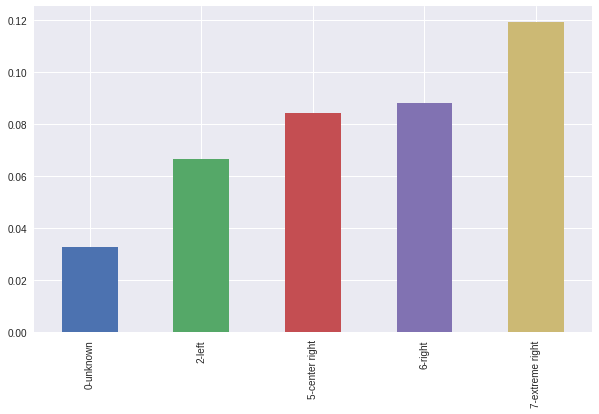

In [163]:
plt.figure(figsize=(10,6))
z.CREDIBILITY.plot(kind = 'bar')

In [164]:
z_url = pd.concat([data_f[data_f.pred == "FAKE"].url.value_counts(),data_f[data_f.pred == "REAL"].url.value_counts()], join='outer', axis = 1)
z_url.fillna(0, inplace = True)
z_url.columns = ['FAKE', 'REAL']
z_url['TOTAL'] = z_url.REAL + z_url.FAKE
z_url['CREDIBILITY'] = z_url.REAL/(z_url.FAKE +z_url.REAL)
#z_url.to_csv('data/z_url_pred.csv')
z_url[z_url.TOTAL>10].sort_values(by = 'CREDIBILITY', na_position='last', ascending=0).head(10)

,FAKE,REAL,TOTAL,CREDIBILITY
awdnews.com,72,23.0,95.0,0.242105
conservativetribune.com,78,22.0,100.0,0.220000
100percentfedup.com,17,4.0,21.0,0.190476
addictinginfo.org,18,2.0,20.0,0.100000
counterpunch.org,19,2.0,21.0,0.095238
blacklistednews.com,85,8.0,93.0,0.086022
antiwar.com,87,8.0,95.0,0.084211
abovetopsecret.com,83,7.0,90.0,0.077778
beforeitsnews.com,50,4.0,54.0,0.074074
amren.com,83,6.0,89.0,0.067416


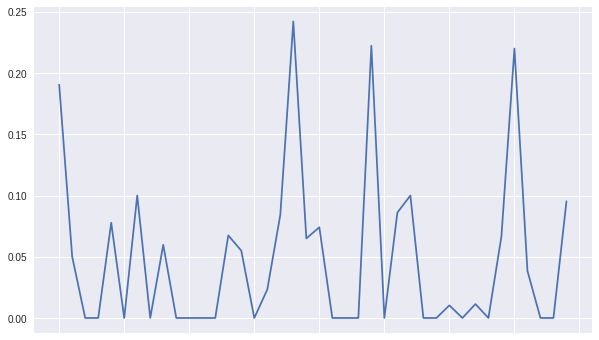

In [165]:
plt.figure(figsize=(10,6))
z_url.CREDIBILITY.plot()

In [166]:
texts = data_f.tokens.tolist()
y = data_f.pred.tolist()
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
X = vectorizer.fit_transform(texts)
data_f.head()

,url,title,text,wing,conspiracy,label,src_url_polarity,tokens,pred
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In GovâÃ...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,1.0,print pay back money plu interest entir famili...,FAKE
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,1.0,attorney gener loretta lynch plead fifth barra...,FAKE
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,7-extreme right,0,FAKE,1.0,red state fox news sunday report morn anthoni ...,FAKE
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,7-extreme right,0,FAKE,1.0,email healthcar reform make america great sinc...,FAKE
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,7-extreme right,0,FAKE,1.0,print hillari goe absolut berserk explod bill ...,FAKE


In [0]:

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [0]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [169]:
total_features = len(vectorizer.get_feature_names())
print('{} total features prior to selection'.format(total_features))
ch2 = SelectKBest(chi2, k=500)
X_train = ch2.fit_transform(X_train, y_train)
X_test = ch2.transform(X_test)
X = ch2.transform(X)

6717 total features prior to selection


In [170]:
X.shape

(1446, 500)

In [0]:

feature_names = list(vectorizer.get_feature_names())
mask = ch2.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

In [172]:

data_frame = pd.DataFrame(data=X.todense(), columns=new_features)
data_frame.describe()

,130,15000,1800,1999,2002,2006,2012,abc,abdullah,abnorm,...,ãºalmost,ãºbill,ãºclinton,ãºinstead,ãºlet,ãºprobabl,ãºput,ãºsexual,ãºthatâ,ãºyou
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,0.000228,0.000278,0.000318,0.000629,0.000691,0.000989,0.003325,0.000886,0.000385,0.000252,...,0.000224,0.000315,0.000331,0.000272,0.000298,0.000486,0.000222,0.000554,0.000684,0.001555
std,0.004137,0.005526,0.005349,0.007153,0.005894,0.009096,0.016719,0.008268,0.006265,0.004573,...,0.003617,0.005503,0.005456,0.004937,0.003808,0.005379,0.003830,0.010164,0.008080,0.010511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.107380,0.153814,0.107545,0.128385,0.100067,0.220095,0.289147,0.151374,0.157322,0.103466,...,0.100652,0.140391,0.149628,0.107656,0.067782,0.111192,0.093486,0.287619,0.172520,0.120915


Training and predicting with Linear SVM

In [173]:

classifier_SV = LinearSVC()
%time classifier_SV.fit(X_train, y_train)
print('Accuracy: {}'.format(round(classifier_SV.score(X_test, y_test), 3)))


classifier_RFC = RandomForestClassifier()
%time rfc = classifier_RFC.fit(X_train, y_train)
print('Accuracy: {}'.format(round(classifier_RFC.score(X_test, y_test), 3)))

CPU times: user 6.78 ms, sys: 979 µs, total: 7.76 ms
Wall time: 10.1 ms
Accuracy: 0.924
CPU times: user 35.5 ms, sys: 0 ns, total: 35.5 ms
Wall time: 35.2 ms
Accuracy: 0.924


In [174]:
classifier_GNB = GaussianNB()
%time classifier_GNB.fit(X_train.toarray(), y_train)
print('Accuracy: {}'.format(round(classifier_GNB.score(X_test.toarray(), y_test), 3)))

CPU times: user 25.4 ms, sys: 1.95 ms, total: 27.4 ms
Wall time: 34.9 ms
Accuracy: 0.776


In [179]:

classifier_GBC = GradientBoostingClassifier()
%time classifier_GBC.fit(X_train.toarray(), y_train)
print('Accuracy: {}'.format(round(classifier_GBC.score(X_test.toarray(), y_test), 3)))

CPU times: user 1.03 s, sys: 930 µs, total: 1.03 s
Wall time: 1.04 s
Accuracy: 0.917


It can be seen that using Random forests classifier gives higher accuracy

In [178]:
from google.colab import files
uploaded = files.upload()

Saving fake_real_dataset_spam_category_clickbait_toxicity.csv to fake_real_dataset_spam_category_clickbait_toxicity.csv


In [180]:
dct = pd.read_csv("fake_real_dataset_spam_category_clickbait_toxicity.csv")
dct.head(10)

,Unnamed: 0,Unnamed: 0.1,uuid,ord_in_thread,author,published,title,text,language,crawled,...,likes,comments,shares,type,content,spam_score_fector,category_factor,fake,click_bait_score,toxicity_factor
0,0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,...,0,0,0,bias,print they pay back money plus interest the en...,0.993337,business,0,0.999951,0
1,1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,...,0,0,0,bias,why did attorney general loretta lynch plead t...,0.824470,business,0,0.997981,0
2,2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,english,2016-10-31T01:41:49.479+02:00,...,0,0,0,bias,red state fox news sunday reported morning ant...,0.998415,business,0,0.001113,0
3,3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,...,0,0,0,bias,email kayla mueller prisoner tortured isis cha...,0.982233,sport,0,0.001539,0
4,4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,...,0,0,0,bias,email healthcare reform to make america great ...,0.976653,business,0,0.998544,0
5,5,5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,0,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,2016-11-02T16:31:28.550+02:00,...,0,0,0,bias,print hillary go absolutely berserk ! she expl...,0.975412,entertainment,0,0.002307,0
6,6,6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,0,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T02:13:46.065+02:00,...,0,0,0,bias,breaking ! nypd ready to make arrests in weine...,0.999700,tech,0,0.998818,0
7,7,7,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,0,Fed Up,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T05:59:07.458+02:00,...,0,0,0,bias,breaking ! nypd ready to make arrests in weine...,0.966355,politics,0,0.998474,0
8,8,8,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,0,Fed Up,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,\r\nLimbaugh said that the revelations in the ...,english,2016-11-07T10:20:06.409+02:00,...,0,0,0,bias,limbaugh said revelation wikileaks material st...,0.968781,business,0,1.000000,0
9,9,9,f54d8e13010d0a79893995ee65360ad4b38b5a35,0,Fed Up,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""‚Ä¶Bu...",Email \r\nThese people are sick and evil. They...,english,2016-11-07T10:20:27.252+02:00,...,0,0,0,bias,email these people sick evil they will stop no...,0.964035,sport,0,0.999935,0


Adding political affliation for the team dataset that contains other features such as spam ,clickbait etc

In [0]:
dct['src_url_polarity']= 0.5
dct.loc[dct.site_url.str.contains('consortiumnews|usatoday|politifact|sctimes|timesofsandiego'),'src_url_polarity'] = '0.5'
dct.loc[dct.site_url.str.contains('presstv|mintpressnews|latimes|chicagotribune|bustle|natmonitor|politico'),'src_url_polarity'] = '0.4'
dct.loc[dct.site_url.str.contains('antiwar|russia-insider|sputniknews|strategic-culture|postbulletin|hpenews|ustfactsdaily'),'src_url_polarity'] = '0.6'
dct.loc[dct.site_url.str.contains('politicususa|opednews|liberalamerica|truthdig|counterpunch|blackagendareport|guardianlv|ahtribune|intrepidreport|wakingtimes|addictinginfo|activistpost|other98|countercurrents|huffingtonpost|rabble|cnn'),'src_url_polarity'] = '0.2'
dct.loc[dct.site_url.str.contains('naturalnews|ijr|wearechange|awdnews|twitchy|thenewamerican|amtvmedia|abovetopsecret|nowtheendbegins|thecommonsenseshow|fromthetrenchesworldreport|nakedcapitalism|prisonplanet|investmentwatchblog|ronpaulinst|thecontroversialfiles|gulagbound|rt|thedailybell|corbettreport|zerohedge|whatreally|wikileaks|newstarg|regated|southfront'),'src_url_polarity'] = '0.9'
dct.loc[dct.site_url.str.contains('occupydemocrats|ifyouonlynews|pravdareport|usuncut|newcenturytimes|trueactivist|dailynewsbin'),'src_url_polarity'] = '0.0'
dct.loc[dct.site_url.str.contains('madworldnews|thefederalistpapers|conservativetribune|libertyunyielding|truthfeed|freedomoutpost|frontpagemag|dccl|othesline|wnd|ihavethetruth|amren|barenakedislam|returnofkings|trunews|jewsnews|shtfplan|lewrockwell|dailystormer|libertynews|endingthefield|dailywire|vdare|100percentfedup|21stcenturywire|westernjournalism|redflagnews|libertywritersnews|conservativedailypost|departed|breitbart|donaldtrumpnews.co|bipartisanreport|americanlookout|spinzon|usapoliticsnow|usanewsflash|hangthebankers|toprightnews|usasupreme|americasfreedomfighters|viralliberty'),'src_url_polarity'] = '1.0'

In [189]:
dct.head(10)

,Unnamed: 0,Unnamed: 0.1,uuid,ord_in_thread,author,published,title,text,language,crawled,...,comments,shares,type,content,spam_score_fector,category_factor,fake,click_bait_score,toxicity_factor,src_url_polarity
0,0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,...,0,0,bias,print they pay back money plus interest the en...,0.993337,business,0,0.999951,0,1.0
1,1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,...,0,0,bias,why did attorney general loretta lynch plead t...,0.824470,business,0,0.997981,0,1.0
2,2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,english,2016-10-31T01:41:49.479+02:00,...,0,0,bias,red state fox news sunday reported morning ant...,0.998415,business,0,0.001113,0,1.0
3,3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,...,0,0,bias,email kayla mueller prisoner tortured isis cha...,0.982233,sport,0,0.001539,0,1.0
4,4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,...,0,0,bias,email healthcare reform to make america great ...,0.976653,business,0,0.998544,0,1.0
5,5,5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,0,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,2016-11-02T16:31:28.550+02:00,...,0,0,bias,print hillary go absolutely berserk ! she expl...,0.975412,entertainment,0,0.002307,0,1.0
6,6,6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,0,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T02:13:46.065+02:00,...,0,0,bias,breaking ! nypd ready to make arrests in weine...,0.999700,tech,0,0.998818,0,1.0
7,7,7,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,0,Fed Up,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T05:59:07.458+02:00,...,0,0,bias,breaking ! nypd ready to make arrests in weine...,0.966355,politics,0,0.998474,0,1.0
8,8,8,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,0,Fed Up,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,\r\nLimbaugh said that the revelations in the ...,english,2016-11-07T10:20:06.409+02:00,...,0,0,bias,limbaugh said revelation wikileaks material st...,0.968781,business,0,1.000000,0,1.0
9,9,9,f54d8e13010d0a79893995ee65360ad4b38b5a35,0,Fed Up,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""‚Ä¶Bu...",Email \r\nThese people are sick and evil. They...,english,2016-11-07T10:20:27.252+02:00,...,0,0,bias,email these people sick evil they will stop no...,0.964035,sport,0,0.999935,0,1.0


In [0]:
dct.to_csv('fake_real_dataset_spam_category_clickbait_toxicity_politafln.csv')

In [0]:
files.download("fake_real_dataset_spam_category_clickbait_toxicity_politafln.csv")